<a href="https://colab.research.google.com/github/rachel-kim2255/Caregiver-Hiring-MVP-Development/blob/main/Caregiver_Sentiment_Analysis(Portfolio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Analysis for Caregiver Hiring MVP Development**

# **0. Introduction**

As part of an early-stage MVP ideation for a caregiver hiring platform, this project explores Reddit discussions related to caregiving to uncover key user pain points, unmet needs, and regional demand patterns.

Using web scraping and text analysis techniques, I collected and analyzed posts from both caregiver-focused subreddits and Canada-specific communities.
The goal was to extract raw, unfiltered insights to guide product direction and validate market needs for **CareCarry**, a caregiver hiring and tax compliance platform.
Key methods include keyword filtering, sentiment analysis, and regional segmentation.

# **1. Reddit Scraping**

In [ ]:
# Import Library for Praw
!pip install praw
import praw
import pandas as pd
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 7.5 MB/s eta 0:00:00


In [ ]:

# Enter user information for Access to Reddit
reddit = praw.Reddit(
    client_id="EPxk****Qeitrb_PuQ",
    client_secret="VCtdzE9j***3n8DBtPMz_8w",
    password="hb@q***aXYn",
    user_agent="Ap**83",
    username="Ap**83",
)

## **1-1. Unduplicated Posting Scraping**

In [ ]:
# -----------------------
# 2. Regional Reddit Scraping (Canada)
# -----------------------

# keywords, subreddit list
keywords = [
    "caregiver", "care giver", "PSW",
    "home care", "elder care", "hiring caregiver", "paying caregiver",
    "caregiver tax", "caregiver CRA", "caregiver immigration",
    "caregiver sponsorship"
]
subreddits = ["caregivers", "PersonalFinanceCanada", "eldercare", "legaladvicecanada", "ImmigrationCanada", "CaregiverSupport",
              "dementia", "AgingParents", "caregiving", "CancerCaregivers","Medicare", "disability", "caregiversofreddit"]

posts = []


seen_ids = set()

for subreddit in subreddits:
    sub = reddit.subreddit(subreddit)
    for keyword in keywords:
        for submission in sub.search(keyword, limit=1000):
            if submission.id not in seen_ids:
                seen_ids.add(submission.id)
                posts.append([
                    subreddit,
                    keyword,
                    submission.id,
                    submission.title,
                    submission.selftext,
                    submission.score
                ])

df = pd.DataFrame(posts, columns=["Subreddit", "Keyword", "PostID", "Title", "Text", "Score"])
df.to_csv("keyword_tagged_posts.csv", index=False)

unique_df = df.drop_duplicates(subset=["PostID"])

unique_df.to_csv("unique_posts.csv", index=False)
print(f"{len(unique_df)} unique posts saved to unique_posts.csv")


In [ ]:
unique_df

,Subreddit,Keyword,PostID,Title,Text,Score
0,caregivers,caregiver,1kn08wg,Consequences of caregiving... years later,I was the caretaker for my parents from mid-20...,64
1,caregivers,caregiver,1m6g6vf,I (33/f) don't feel like myself anymore after ...,I’m 33F and the full-time live-in caregiver fo...,26
2,caregivers,caregiver,1fpm5rc,Question about a black Caregiver,If a black Caregiver says you have white privi...,3
3,caregivers,caregiver,1mcqcjb,Always the caregiver by default (mostly ventin...,"Long story here, which I won't go into, but th...",11
4,caregivers,caregiver,1mgz2m8,I start a caregiver job soon. Can anyone give ...,Also any basic recipe ideas or meal planning t...,1
...,...,...,...,...,...,...
7891,caregiversofreddit,home care,1lp82bs,Speak Up for Better Ascites Care,I’m a graduating student from Brandeis Univers...,1
7892,caregiversofreddit,home care,1fjw8eb,University Project Survey,Hello! I'm a university student whose group is...,1
7893,caregiversofreddit,home care,1dpkrdu,How should I tell my father I'm moving out sin...,My mother died last year of stage IV cancer. I...,3
7894,caregiversofreddit,home care,fubtcv,Oh dear god i need a break,So i & my hubby and i live with my dad whom ha...,2


**Unduplicated Posting Scraping**:  
This project focuses on analyzing unique Reddit posts (unique_posts.csv) by removing duplicates across keyword searches.  
This ensures that sentiment analysis, topic modeling, and other content-based insights are based on distinct user-generated content for more accurate results.

## **1-2. Regional Posting Scraping**

In [ ]:
# -----------------------
# 2. Regional Reddit Scraping (Canada)
# -----------------------

# Keywords related to caregiver topics
keywords = [
    "caregiver", "care giver", "PSW",
    "home care", "elder care", "hiring caregiver", "paying caregiver",
    "caregiver tax", "caregiver CRA", "caregiver immigration",
    "caregiver sponsorship"
]

# Canadian province/city subreddits
canadian_regions = [
    "vancouver", "britishcolumbia", "ontario", "toronto",
    "calgary", "alberta", "winnipeg", "manitoba",
    "montreal", "quebec", "halifax", "novaScotia",
    "saskatchewan", "canada"
]

# Initialize results and ID tracking
regional_posts = []
seen_ids = set()

start_time = time.time()

# Scraping loop
for subreddit in canadian_regions:
    sub = reddit.subreddit(subreddit)
    for keyword in keywords:
        for submission in sub.search(keyword, limit=1000):
            if submission.id not in seen_ids:
                seen_ids.add(submission.id)
                regional_posts.append([
                    subreddit,
                    keyword,
                    submission.id,
                    submission.title,
                    submission.selftext,
                    submission.score
                ])

# Save to DataFrame
region_df = pd.DataFrame(regional_posts, columns=["Subreddit", "Keyword", "PostID", "Title", "Text", "Score"])
region_df.to_csv("regional_posts.csv", index=False)

print(f"{len(region_df)} regional posts saved to 'regional_posts.csv' in {time.time() - start_time:.2f} seconds.")

In [ ]:
region_df

,Subreddit,Keyword,PostID,Title,Text,Score
0,vancouver,caregiver,b1h231,Just a little extra caregiving to our Muslim f...,"If appropriate, it's ok to do a little check i...",861
1,vancouver,caregiver,13yigbt,Caregivers to those with cancer...,Vancouver coastal health has been a huge letdo...,105
2,vancouver,caregiver,fech9w,Dear fellow BC caregivers of elderly relatives...,Edit: Sorry for not responding. I was in a bad...,101
3,vancouver,caregiver,1h7hahn,B.C. parents sue woman with history of illegal...,,253
4,vancouver,caregiver,mlmhg0,"So you have COVID, what now?",I decided to create a post as I couldn't find ...,1305
...,...,...,...,...,...,...
3416,canada,elder care,705k0r,Has anyone dealt with marriage fraud with an e...,TLDR: A Chinese woman is trying to get her cit...,1
3417,canada,elder care,3so86h,"""Just watch me""",Canadian Prime Minister Justin Trudeau's fathe...,0
3418,canada,elder care,1vegxd,The Ballad of Frank Meyers,[An amazing song in support of Frank Meyers](h...,0
3419,canada,elder care,2mljy2,Hello r/canada! I'm a Peruvian healthcare stud...,"Let's try again, I was caught in the spam filt...",0


**Regional Posting Scraping**:  
To understand region-specific needs and caregiver demand patterns, this project collected Reddit posts from Canada-based subreddits (e.g., r/vancouver, r/ontario, r/canada). By targeting localized communities, the dataset (regional_posts.csv) helps identify geographic differences in caregiving concerns and service gaps.

In [ ]:
# Save the datasets
from google.colab import drive
drive.mount('/content/drive')

# Saving the csv files
save_path = "/content/drive/MyDrive/Colab Notebooks/CareCarry/Reddit_data"

#df.to_csv(f"{save_path}/keyword_tagged_posts.csv", index=False)
unique_df.to_csv(f"{save_path}/unique_posts.csv", index=False)
region_df.to_csv(f"{save_path}/regional_posts.csv", index=False)

Mounted at /content/drive


## **1-3. Sentiment Analysis**

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

# VADER
nltk.download('vader_lexicon')

df = pd.read_csv("unique_posts.csv")  # unduplicated_posts.csv


def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Cleaned_Text'].apply(analyze_sentiment)

# result
df.to_csv("deduplicated_with_sentiment.csv", index=False)
df['Sentiment'].value_counts()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,count
Sentiment,
positive,5052
negative,2325
neutral,519


Based on a simple sentiment analysis of unique posts, approximately 62% of the posts were classified as positive, 29% as negative, and 6% as neutral. This suggests that while many discussions around caregiving are constructive or informative, a significant portion also reflects frustration or concern.

# **2. Pain Point Keyword-based Emotion/Frequency Analysis**

In [ ]:
# Keywords List
keywords = ['cost', 'trust', 'fraud', 'tax', 'illegal', 'schedule',
            'communication', 'psw', 'nanny', 'hiring', 'agency']

results = []

# Analysis for each keywords
for kw in keywords:
    # Filtering posts that contain the keyword
    keyword_df = df[df['Cleaned_Text'].str.lower().str.contains(kw, na=False)]

    total = len(keyword_df)
    if total == 0:
        results.append({
            'keyword': kw,
            'total_posts': 0,
            'negative_count': 0,
            'negative_ratio': 0.0
        })
        continue

    # Counts of each sentiment category
    sentiment_counts = keyword_df['Sentiment'].value_counts().to_dict()
    negative_count = sentiment_counts.get('negative', 0)
    negative_ratio = negative_count / total

    results.append({
        'keyword': kw,
        'total_posts': total,
        'negative_count': negative_count,
        'negative_ratio': round(negative_ratio, 3)
    })

# Result
painpoint_df = pd.DataFrame(results)
painpoint_df = painpoint_df.sort_values(by='negative_ratio', ascending=False).reset_index(drop=True)

painpoint_df

,keyword,total_posts,negative_count,negative_ratio
0,illegal,71,38,0.535
1,fraud,61,26,0.426
2,schedule,369,134,0.363
3,trust,375,127,0.339
4,psw,170,50,0.294
5,agency,333,94,0.282
6,hiring,204,56,0.275
7,cost,659,179,0.272
8,communication,136,37,0.272
9,nanny,41,10,0.244


Based on sentiment and frequency analysis of pain point keywords,
terms like illegal, fraud, schedule, and trust showed the highest negative sentiment ratios. This suggests that users often express frustration around legal risks, lack of trust in services, and scheduling difficulties. Notably, over half of the posts mentioning illegal or fraud were negative, indicating strong concern about unlawful hiring practices and financial fraud in caregiving contexts.

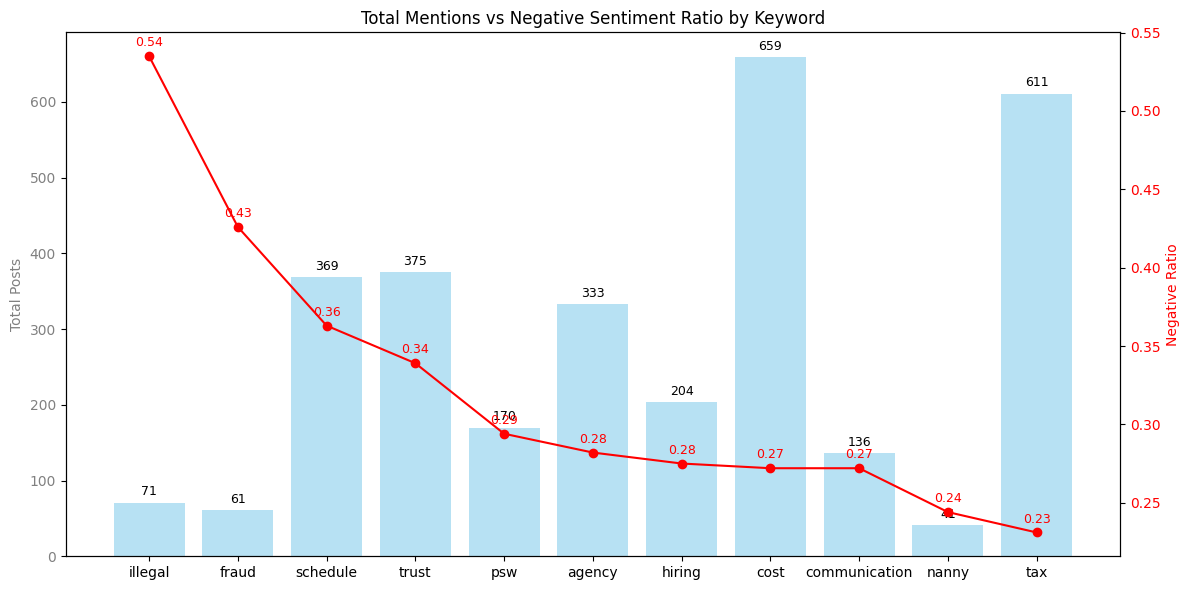

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar: Total Mentions
bars = ax1.bar(painpoint_df['keyword'], painpoint_df['total_posts'], alpha=0.6, label='Total Posts', color='skyblue')
ax1.set_ylabel("Total Posts", color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color='black')

# Line: Negative sentiment ratio
ax2 = ax1.twinx()
line = ax2.plot(painpoint_df['keyword'], painpoint_df['negative_ratio'], color='red', marker='o', label='Negative Ratio')
ax2.set_ylabel("Negative Ratio", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add value labels on line plot
for i, ratio in enumerate(painpoint_df['negative_ratio']):
    ax2.annotate(f'{ratio:.2f}',
                 xy=(painpoint_df['keyword'][i], ratio),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color='red')

plt.title("Total Mentions vs Negative Sentiment Ratio by Keyword")
fig.tight_layout()
plt.show()


To enhance interpretability beyond the numeric table, I visualized both the total number of keyword mentions and their respective negative sentiment ratios. The bar chart represents the total post count per keyword, while the red line indicates the proportion of negative sentiment. This allows us to quickly identify keywords that are frequently mentioned but less negative, versus those that are less mentioned but highly negative, offering a more nuanced understanding of pain points in caregiver-related discussions.

### 🔎 Observation

- The highest negative sentiment ratios were observed in keywords such as illegal (54.9%), fraud (42.4%), and schedule (36.2%), indicating clear dissatisfaction related to illegal employment, caregiver scams, and scheduling issues.

- Keywords like trust, agency, and communication, which are associated with caregiver reliability and third-party services, also showed relatively high negative sentiment levels.

- While tax had one of the highest mention volumes (601 posts, 2nd among all keywords), its negative sentiment ratio was comparatively low at 23.3%. This suggests that caregiver-related tax issues may stem more from confusion or avoidance rather than explicit dissatisfaction — a point further explored through qualitative analysis.

### 💡 Insight

1. Lack of trust, illegal employment, and frustration with scheduling are recurring issues. CareCarry’s verification system, automation, and transparent matching process can effectively address these problems.

2. Tax-related concerns represent a hidden opportunity. Although emotional complaints are relatively low, the high number of mentions shows that this is a pain point users are aware of but don’t know how to solve, which CareCarry can address.

3. By offering tax automation and support for legal employment, CareCarry can build differentiation and trust.

4. CareCarry is not just a matching platform. Its core strengths are trust management, employment stability, and administrative convenience.

## **2-1.Qualitative Analysis: Tax-Related**

Tax is the second most frequently mentioned keyword among all topics, yet it shows a relatively low proportion of negative sentiment. This suggests that emotional responses around caregiver tax issues are muted, possibly due to a lack of public education and the absence of clear, transparent solutions in the market.

Since CareCarry is a platform that simplifies tax filing and supports legal employment, this analysis aims to explore how it can bridge the current gap and provide clarity in an overlooked but important area.

In [ ]:
# Condition 1: Care situation keywords
care_keywords = ['caregiver', 'nanny', 'psw', 'support worker', 'home care', 'hired', 'live-in']

# Condition 2: Tax-related concern keywords
tax_keywords = ['tax', 'taxes', 'report', 'file', 'deduct', 'claim', 'under the table', 'audit',
                'income', 'cra', 'credit', 'dependent', 'illegal', 'revenue', 'write off']

# Function to check if care-related context exists
def is_care_context(text):
    return any(kw in text.lower() for kw in care_keywords)

# Function to extract sentences that mention both care and tax context
def extract_relevant_tax_sentences(text):
    sentences = re.split(r'(?<=[.!?]) +', text.lower())
    return [s.strip() for s in sentences if is_care_context(s) and any(k in s for k in tax_keywords)]

# Filter posts that mention 'tax'
tax_df = df[df['Cleaned_Text'].str.lower().str.contains('tax', na=False)].copy()

# Extract relevant sentences
tax_df['relevant_tax_sentences'] = tax_df['Cleaned_Text'].apply(extract_relevant_tax_sentences)

# Keep posts that include at least one matched sentence
final_tax_related = tax_df[tax_df['relevant_tax_sentences'].apply(lambda x: len(x) > 0)]

# Display sample results
for i, row in final_tax_related.head(20).iterrows():
    print(f"PostID: {row['PostID']}")
    for sent in row['relevant_tax_sentences']:
        print(f" - {sent}")
    print("="*60)


PostID: 1jt23ov
 - i have hired a caregiver like one or twice a week and of course i was paying them in the hourly wage labor laws, but then i came across with all this other information about like taxes, etc.
PostID: 10tlz8r
 - i have for the past several years acted as the caregiver for my father, and in recent months have been working towards potentially **legally** being recognized as such to have some sort of income rather than just *only* burning my life away and taking on increasingly more burden with 0 money to actually show for anything.
PostID: 1enel6x
 - the income is tax exempt and in many states a caregiver doesn't have to lose benefits while getting paid by the state.
PostID: 1lkdyil
 - i submitted electronically 6 years of previous tax returns to have caregiver benefit adjustment added now that i am caregiver for a special needs family member.
PostID: 1jskviw
 - wondering if anyone has any advice on how to retroactively apply for the caregiver disability tax credit (prev

> ### 🔎 Observation: useful sententces
> PostID: 1jt23ov
 - i have hired a caregiver like one or twice a week and of course i was paying them in the hourly wage labor laws, but then i came across with all this other information about like taxes, etc.


In [ ]:
# Define confusion/question expressions (more restrictive)
tax_question_patterns = [
    "how do i", "can i", "should i", "what do i", "i wonder", "is there a way",
    "anyone know", "does anyone know", "is there", "how to", "am i eligible",
    "need help", "don't understand", "i'm confused"
]

# Updated extraction function
def extract_tax_questions(text):
    text = str(text).lower()
    sentences = re.split(r'(?<=[.!?]) +', text)
    result = []
    for s in sentences:
        if (
            any(c in s for c in care_keywords) and
            any(t in s for t in tax_keywords) and
            (
                "?" in s or
                any(p in s for p in tax_question_patterns)
            )
        ):
            result.append(s.strip())
    return result

final_tax_related['tax_question_sentences'] = final_tax_related['Cleaned_Text'].apply(extract_tax_questions)
tax_questions_df = final_tax_related[final_tax_related['tax_question_sentences'].apply(lambda x: len(x) > 0)]

# print
for i, row in tax_questions_df.iterrows():
    print(f"PostID: {row['PostID']}")
    for s in row['tax_question_sentences']:
        print(f" - {s}")
    print("=" * 60)


PostID: 1jskviw
 - wondering if anyone has any advice on how to retroactively apply for the caregiver disability tax credit (previously different name).
PostID: 1jenpcw
 - it seems if the cra has approved the disability, it should also trigger the caregiver amount?
PostID: 1j1u8zu
 - hired a caregiver for my parents in 2024 and was wondering if we could deduct both the salary and taxes they pay her against their retirement income they are receiving?
PostID: 1gqud5x
 - to confirm how this works - i have used this calculator [https://apps.cra-arc.gc.ca/ebci/rhpd/beta/step1](https://apps.cra-arc.gc.ca/ebci/rhpd/beta/step1) is that all, and i need to pay the caregiver the amount provider and send the government the tax that is withheld?
PostID: 1bhupsa
 - 1) am i eligible to claim the caregiver credit?
 - 2) and if so, would my claiming the caregiver credit reduce his disability tax credit?
PostID: x6mab0
 - do i need to contact cra and switch the primary caregiver designation?
PostID: iv6

/tmp/ipython-input-2156150564.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_tax_related['tax_question_sentences'] = final_tax_related['Cleaned_Text'].apply(extract_tax_questions)


## **2-2. Qualitative Analysis: Family Care**

In [ ]:
help_keywords = [
    "i need help", "need a break", "someone to take over", "respite care",
    "anyone available", "how do i find", "can someone help", "i'm overwhelmed",
    "anyone you recommend", "backup caregiver", "i can't do this alone",
    "fill in for me", "step in", "help me out", "take care for a day"
]

care_keywords = [
    "caregiver", "psw", "nanny", "home care", "support worker",
    "family caregiver", "taking care of", "helping my mom", "caring for my dad"
]


def is_help_request(text):
    text = str(text).lower()
    return any(h in text for h in help_keywords) and any(c in text for c in care_keywords)

help_df = df[df['Cleaned_Text'].apply(is_help_request)]

# Print sample posts
for i, row in help_df.head(20).iterrows():
    print(f"PostID: {row['PostID']}")
    print(f"- {row['Cleaned_Text'][:300]}...")
    print("="*50)


PostID: 1kfn4rk
- I am a full time caregiver for my adult son with MS. He is bed and wheelchair bound and requires 24 hour support. He is also incontinent I am wanting to find a caregiver for respite care PRN. Does anyone know what would be fair pay in Alabama?...
PostID: 1j7my8p
- My grandmother has required 24/7 assistance for about the last 5 years, and she and my late grandfather both wanted to stay home and not go into a facility. That has meant having live-in care at home. The main caregiver was already her housekeeper of 20+ years whom she loves like family, so she sort...
PostID: mrtlb8
- I (22yo) need to hire someone to take over the minor care of my mother ASAP. She’s 42 years old and only needs help with very, very basic household things like occasional store trips (cigarettes/groceries/whatnot), light cleaning around the house and someone to walk her dog once a day. Sometimes she...
PostID: 8eqkw2
- I don't know if caregiver is too strong of a word. I need someone to be aro

> ### 🔎 Observation:
Many users are taking on the responsibility of caregiving for family members themselves, and are experiencing significant fatigue and emotional stress in the process.
Key patterns across posts include:
- Long-term, solo caregiving due to a parent's dementia or mobility issues
- Lack of available family support and a sense of emotional isolation
- Preference for aging at home rather than facility placement, but no one to provide the necessary support

<br>

> ### 💡 Insight: The Need for Part-Time and Short-Term Care Support  
There is a clear demand for part-time or occasional assistance — someone to cover a few hours, run errands like grocery shopping, or help for a day or two.
This reflects a practical need for a short-term or supplemental caregiver matching system that can relieve family caregivers from time to time.

# **3. Caregiver vs Employer: Rule-based filtering**

Using a rule-based approach, we classified posts from the perspectives of employers and caregivers, then analyzed the key complaints expressed by each group.
Through this analysis, we identified the major pain points that CareCarry can address and outlined specific solutions the platform can offer.

## **3-1. Caregiver**

In [ ]:
# rule-based keywords list: caregiver
worker_keywords = [
    "i'm a caregiver", "i work as", "i’ve been a nanny", "i work for", "they don't pay",
    "my client", "my employer", "i’m working for", "as a support worker", "i do home care",
    "i'm a psw", "as a nanny", "they underpay", "i care for", "they hired me",
    "i get paid", "i got fired", "i lost my job", "they didn’t pay", "i clean", "i help", "i'm live-in", "as a caragiver"
]

def is_worker_perspective(text):
    text = str(text).lower()
    return any(phrase in text for phrase in worker_keywords)

# filtering posts
worker_df = df[df['Cleaned_Text'].apply(is_worker_perspective)].copy()


# print
print(f"Total number of caregiver viewpoint posts: {len(worker_df)}")
print(worker_df[['PostID', 'Cleaned_Text']].head(5))


Total number of caregiver viewpoint posts: 412
     PostID                                       Cleaned_Text
7   1m2sk1o  I recently became a caregiver for a company. I...
8   1iilm8x  I have a client that wants me to clean her win...
12  1l8xlhs  How do you properly care for a client who is a...
31  1hl16ys  I work for an agency and am also private pay o...
37  1jjojtp  I'm a professional in-home caregiver. Maybe I'...


In [ ]:
# Caregiver's complaint keywords Analysis
complaint_keywords = [
    "underpaid", "don’t pay", "didn’t pay", "not paid", "no contract", "overworked",
    "abused", "exploited", "disrespect", "unsafe", "illegal", "cash only",
    "fired", "quit", "can’t take it", "not fair", "bad hours", "no benefits",
    "low wage", "too much", "no break", "no respect", "no insurance",
    "no days off", "live-in", "burnout", "mental health", "stress", "anxious",
    "cry", "frustrated", "tired", "exhausted", "toxic", "verbal abuse", "no support"
]

from collections import Counter

all_worker_text = " ".join(worker_df['Cleaned_Text'].dropna().str.lower())

# Count numbers of each keywords
keyword_counts = Counter()
for kw in complaint_keywords:
    count = all_worker_text.count(kw)
    if count > 0:
        keyword_counts[kw] = count

# Results
complaint_summary_caregiver = pd.DataFrame(keyword_counts.items(), columns=["keyword", "count"])
complaint_summary_caregiver = complaint_summary_caregiver.sort_values(by="count", ascending=False).reset_index(drop=True)

complaint_summary_caregiver.head(15)

,keyword,count
0,stress,71
1,tired,68
2,quit,67
3,mental health,44
4,cry,34
5,too much,31
6,exhausted,24
7,fired,20
8,anxious,17
9,frustrated,16


### **1) Stress, Tired, Mental Health, Exhausted, Cry, Anxious, Frustrated**
These indicates high levels of psychological distress and mental fatigue.

>💡 Insight:
- Implement a review-based reward system
- Require employers to submit a "task expectation list" during caregiver application to clarify job responsibilities
- Consider adding a caregiver-to-employer review system for transparency and fairness

<br>

### **2) Quit, Fired**
Indicates low job satisfaction and poor retention rates.

>💡 Insight:
- Offer a flexible part-time format, allowing caregivers to choose their preferred schedule
- Go beyond basic location and skill matching by factoring in work schedules and task types in advance


### **Caregiver: Sample Sentences**

In [ ]:
pip install wordcloud

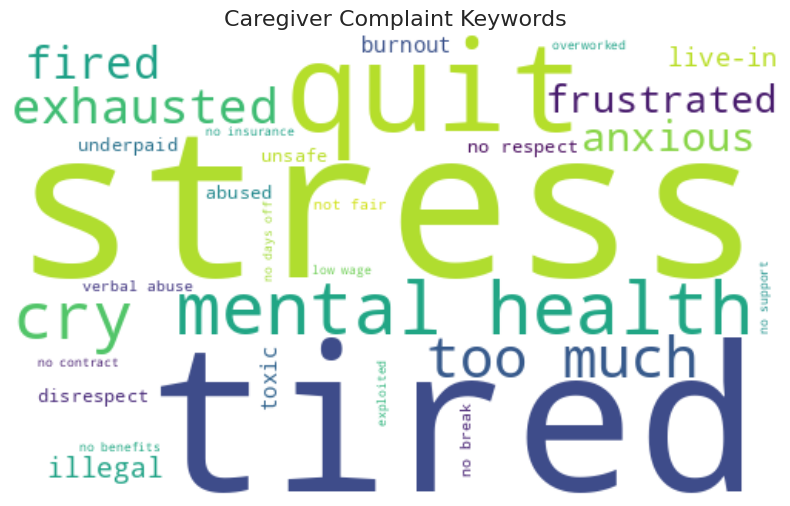

In [ ]:
from wordcloud import WordCloud

# Extract word frequencies
caregiver_freq = dict(zip(complaint_summary_caregiver['keyword'], complaint_summary_caregiver['count']))
caregiver_freq = {k: v for k, v in caregiver_freq.items() if v > 0}  # remove zero counts


# Generate Caregiver WordCloud
wordcloud_caregiver = WordCloud(width=500, height=300, background_color='white').generate_from_frequencies(caregiver_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_caregiver, interpolation='bilinear')
plt.axis('off')
plt.title("Caregiver Complaint Keywords", fontsize=16)
plt.show()


In [ ]:
def extract_emotion_sentences(text):
    text = str(text).lower()
    sentences = re.split(r'(?<=[.!?]) +', text)
    return [s.strip() for s in sentences if any(ek in s for ek in emotion_keywords)]

worker_df['emotion_sentences'] = worker_df['Cleaned_Text'].apply(extract_emotion_sentences)
emotion_posts = worker_df[worker_df['emotion_sentences'].apply(lambda x: len(x) > 0)]

# print sample setences
for i, row in emotion_posts.head(30).iterrows():
    for s in row['emotion_sentences']:
        print(f"- {s}")
    print("="*50)


- i also hold a food handlers card, and would say i keep my own house clean, as also my husband would agree, although it’s not up to his mothers standards due to whatever flaw she can find.
- i still hate it here and i don’t know what to do
- i'm struggling emotionally a little bit because i'm there solely for my client (i work for a 3rd party) and i'm frustrated a bit with somethings.
- my grandmother was invalid(i hate the word but it was her words not mine and it technically was correct) and my grandfather did most of her care.
- and she's hit a point in life where she's tired from carrying everyone else's weight, and now it's everyone else's turn to carry some weight for her.
- i was always working to increase mental health when at that age, the fear of death moves in.
- the mental health challenges that we face juggling our families, jobs & caregiving 4.
- monitoring/entertaining the people we care for when we are not around i’ve seen ai be quite adept at some of those things: 1.


## **3-2. Employer**

In [ ]:
employer_keywords = [
    "i hired", "i employ", "my nanny", "our caregiver", "we hired",
    "looking for a caregiver", "need a nanny", "need a psw", "we need help",
    "she takes care of", "my support worker", "my home care worker",
    "our live-in", "she helps us", "we pay", "i pay her", "we let her go",
    "i fired", "she quit", "we lost our caregiver", "we’re hiring"
]

def is_employer_perspective(text):
    text = str(text).lower()
    return any(phrase in text for phrase in employer_keywords)

employer_df = df[df['Cleaned_Text'].apply(is_employer_perspective)].copy()

print(f"Total number of employer viewpoint posts: {len(employer_df)}")
print(employer_df[['PostID', 'Cleaned_Text']].head(5))

Total number of employer viewpoint posts: 198
      PostID                                       Cleaned_Text
123   zrxq33  Hi All….I’m the last year we finally we able t...
143   wtkm7m  I've searched around but haven't found anythin...
181   lqq4c5  Hi I’m looking for a caregiver job where I can...
281  1i7enyz  I originally posted this is AIO but I think it...
282  1hy00sx  Hello, I’m looking for guidance about how to g...


In [ ]:
# Employer's complaint keywords Analysis
employer_complaint_keywords = [
    "didn’t show up", "no show", "stole", "steal", "unreliable", "lied",
    "dishonest", "lazy", "rude", "quit suddenly", "not trained", "unprofessional",
    "bad attitude", "doesn’t listen", "late", "always late", "careless",
    "not qualified", "can’t trust", "bad with kids", "not clean", "not respectful",
    "poor hygiene", "left early", "talks too much", "phone all day", "texting",
    "social media", "smokes", "drinks", "abusive", "crossed the line", "argument"
]

from collections import Counter

all_employer_text = " ".join(employer_df['Cleaned_Text'].dropna().str.lower())

# Count numbers of each keywords
keyword_counts = Counter()
for kw in employer_complaint_keywords:
    count = all_employer_text.count(kw)
    if count > 0:
        keyword_counts[kw] = count

# Results
complaint_summary_employer = pd.DataFrame(keyword_counts.items(), columns=["keyword", "count"])
complaint_summary_employer = complaint_summary_employer.sort_values(by="count", ascending=False).reset_index(drop=True)

complaint_summary_employer.head(15)


,keyword,count
0,late,100
1,abusive,24
2,rude,21
3,lied,11
4,steal,10
5,stole,9
6,lazy,3
7,social media,3
8,unreliable,3
9,no show,2


### **1) Lied, Rude, Abusive, Unreliable, Steal, Stole, Lazy**
Indicates significant employer concerns about caregivers' honesty, attitude, and ethics.  

>💡 Insight:
- Implement a trust score system based on reviews
- Include identity verification and review history for transparency

<br>

### **2) Late, No show**
Reflects employer frustration with poor time management by caregivers.

>💡 Insight:
- Introduce mobile check-in/check-out functionality
- Add a time management evaluation section in the review system
- Restrict future matches after repeated no-shows
- Provide shift reminders via SMS or app push notifications

### **Employer: Sample sentences**

In [ ]:
def extract_emotion_sentences(text):
    text = str(text).lower()
    sentences = re.split(r'(?<=[.!?]) +', text)
    return [s.strip() for s in sentences if any(kw in s for kw in employer_complaint_keywords)]

employer_df['emotion_sentences'] = employer_df['Cleaned_Text'].apply(extract_emotion_sentences)
emotion_posts = employer_df[employer_df['emotion_sentences'].apply(lambda x: len(x) > 0)]

# print sample sentences
for i, row in emotion_posts.head(30).iterrows():
    for s in row['emotion_sentences']:
        print(f"- {s}")
    print("=" * 50)


- we get into a bit of an argument in front of patient because i say (paraphrasing) “this isn’t helpful, the other caregiver and i agree that keeping consistency with the commode is in her best interest for safety.
- i spoke with the other caregiver and pt later this evening because i wasn’t sure if i was overreacting and there was something i was missing.
- she applied for assistance in may 2019 and received a few letters (to which she responded appropriately) asking for more information and informing her of court dates (that she can't attend due to her anxiety).
- and we should at least be able to claim some pet-related expenses, even if it’s capped or restricted to adopted animals, service animals, or vet care.
- after cross referencing photos from the day and requesting the transaction time stamp from bmo, along with the transaction being exactly 10x what we should have paid, it's clear that these two are related.
- he’s suppose to be the main manager that takes care of escalated s

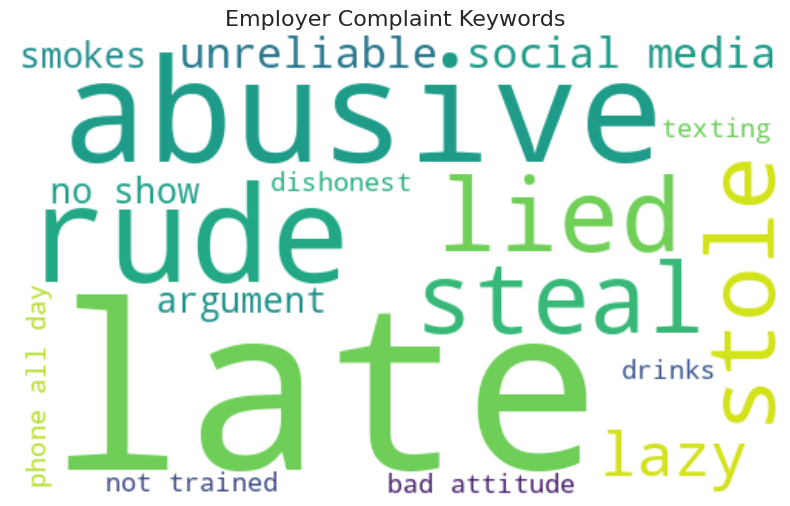

In [ ]:
# Extract word frequencies
employer_freq = dict(zip(complaint_summary_employer['keyword'], complaint_summary_employer['count']))
employer_freq = {k: v for k, v in employer_freq.items() if v > 0}

# Generate Employer WordCloud
wordcloud_employer = WordCloud(width=500, height=300, background_color='white').generate_from_frequencies(employer_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_employer, interpolation='bilinear')
plt.axis('off')
plt.title("Employer Complaint Keywords", fontsize=16)
plt.show()


# **4. Regional Analysis in Canada**

To identify region-specific caregiving concerns and demand patterns, this project collected posts from Canada-based subreddits such as r/vancouver, r/ontario, and r/canada. By analyzing post volume and sentiment trends across regions, we were able to highlight local attitudes toward caregiving and suggest tailored launch strategies.

In [ ]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if pd.isna(text):
        return "neutral"
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

region_df['Sentiment'] = region_df['Text'].apply(get_sentiment)

# Subreddit to Region mapping
region_map = {
    'vancouver': 'Vancouver',
    'britishcolumbia': 'Vancouver',
    'ontario': 'Toronto',
    'toronto': 'Toronto',
    'calgary': 'Calgary',
    'alberta': 'Calgary',
    'manitoba': 'Winnipeg',
    'winnipeg': 'Winnipeg',
    'quebec': 'Montreal',
    'montreal': 'Montreal',
    'halifax': 'Halifax',
    'novascotia': 'Halifax',
    'saskatchewan': 'Saskatchewan',
    'canada': 'National'
}
region_df['Region'] = region_df['Subreddit'].map(region_map)

# Keyword frequency analysis
issue_keywords = ['tax', 'illegal', 'fraud', 'trust', 'stress', 'respite', 'burnout', 'overwhelmed']
for kw in issue_keywords:
    region_df[kw] = region_df['Text'].str.lower().str.contains(kw)

# Aggregate keyword mentions by region
keyword_summary = region_df.groupby('Region')[issue_keywords].sum().reset_index()

# Aggregate sentiment distribution by region
sentiment_summary = region_df.groupby(['Region', 'Sentiment']).size().unstack(fill_value=0).reset_index()

# Add total post count per region
sentiment_summary['Total_Posts'] = sentiment_summary[['positive', 'neutral', 'negative']].sum(axis=1)

# Add percentage columns
sentiment_summary['% Positive'] = (sentiment_summary['positive'] / sentiment_summary['Total_Posts'] * 100).round(1)
sentiment_summary['% Neutral'] = (sentiment_summary['neutral'] / sentiment_summary['Total_Posts'] * 100).round(1)
sentiment_summary['% Negative'] = (sentiment_summary['negative'] / sentiment_summary['Total_Posts'] * 100).round(1)

# Sort by total posts descending
sentiment_summary = sentiment_summary.sort_values(by='Total_Posts', ascending=False)

# Display result
sentiment_summary

Sentiment,Region,negative,neutral,positive,Total_Posts,% Positive,% Neutral,% Negative
5,Toronto,123,340,388,851,45.6,40.0,14.5
0,Calgary,128,89,363,580,62.6,15.3,22.1
6,Vancouver,62,194,270,526,51.3,36.9,11.8
7,Winnipeg,48,223,153,424,36.1,52.6,11.3
3,National,9,273,27,309,8.7,88.3,2.9
1,Halifax,55,63,149,267,55.8,23.6,20.6
2,Montreal,41,28,131,200,65.5,14.0,20.5
4,Saskatchewan,21,55,59,135,43.7,40.7,15.6


> ### 🔎 Regional Analysis
- Toronto: With a total of 843 mentions, Toronto shows the most active discussion nationwide. It has a large user base, a wide variety of issues, and a rich emotional distribution, making it a promising market for initial entry.
- Calgary: Has the highest proportion of positive sentiment. The local attitude toward caregiving services appears receptive, making it well-suited for MVP testing.
- Vancouver: Shows a high proportion of neutral sentiment along with a solid amount of positive sentiment. Users actively seek information and share concerns, indicating potential for effective service introduction and organic user acquisition.

> ### 💡 Suggested Launch & Testing Regions
- Toronto: High volume of caregiver-related discussions, diverse emotional expression, and a robust user base make it ideal for identifying user personas and testing feature adoption. → Recommend as the primary launch market.
- Calgary: Positive sentiment suggests a welcoming environment for new solutions. Suitable for small-scale pilot and review testing. → Recommend as the MVP testing region.

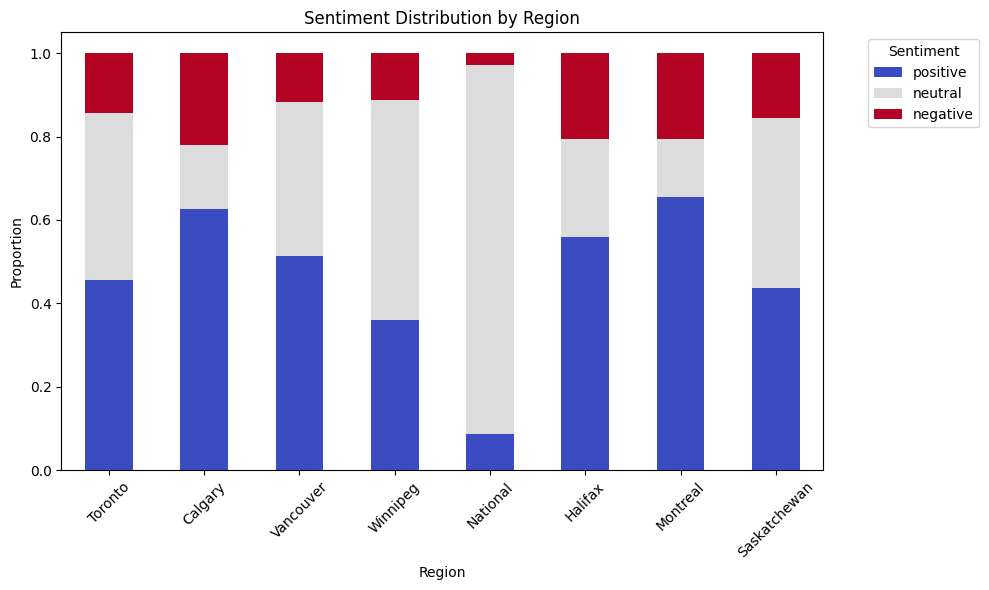

In [ ]:
# Normalize sentiment counts to percent (optional)
sentiment_percent = sentiment_summary.copy()
sentiment_percent[['positive', 'neutral', 'negative']] = sentiment_percent[['positive', 'neutral', 'negative']].div(
    sentiment_percent[['positive', 'neutral', 'negative']].sum(axis=1), axis=0)

# Plot
sentiment_percent.set_index('Region')[['positive', 'neutral', 'negative']].plot(
    kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6)
)
plt.title("Sentiment Distribution by Region")
plt.ylabel("Proportion")
plt.xlabel("Region")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


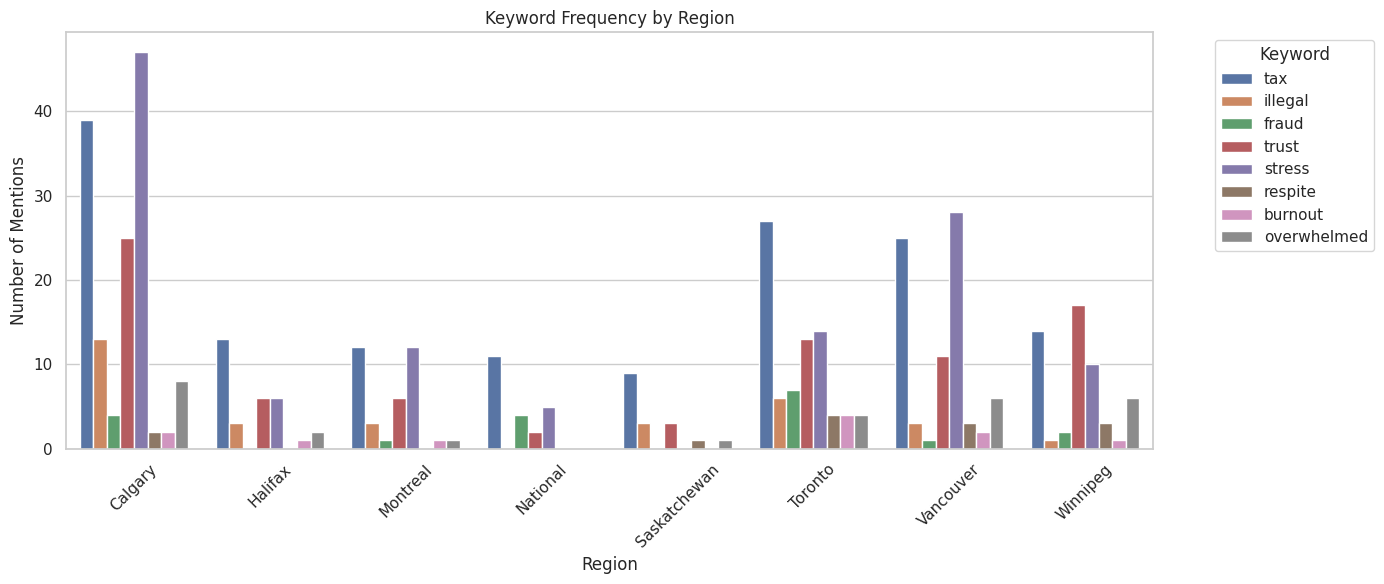

In [ ]:
import seaborn as sns

# Set general style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Melt keyword_summary for plotting
keyword_melted = keyword_summary.melt(id_vars='Region', var_name='Keyword', value_name='Count')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=keyword_melted, x='Region', y='Count', hue='Keyword')
plt.title("Keyword Frequency by Region")
plt.xticks(rotation=45)
plt.ylabel("Number of Mentions")
plt.xlabel("Region")
plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> ### 🔎 Keyword-Based Issue Analysis
- stress: High emotional burden from long-term family caregiving, especially prevalent in Calgary, Toronto, and Vancouver
- tax: Most frequently mentioned keyword nationwide, indicating widespread confusion about government support, reporting, and caregiver-related employment taxes
- trust: Repeated concerns about lack of trust between employers and caregivers
- respite, burnout, overwhelmed: Indicate strong demand for part-time or short-term caregiving support

# **5.Final Insights & Strategic Implications**

Through a combination of sentiment analysis, keyword-based pain point tracking, regional segmentation, and qualitative filtering, this project uncovered the most pressing issues and unmet needs in the caregiver ecosystem.

Key findings include:

- Trust, legal risk, and scheduling emerged as consistent pain points across both caregiver and employer perspectives.

- Tax concerns, though lower in emotional negativity, were frequently mentioned and often accompanied by confusion—highlighting a critical opportunity for education and automation.

- Many caregivers expressed burnout, emotional fatigue, and lack of support, indicating demand for short-term, flexible, or part-time assistance.

- Employers prioritized reliability, punctuality, and transparency, suggesting the need for clear expectations, review systems, and time management tools.

- Regional analysis revealed differing sentiment trends and discussion volumes, suggesting a phased MVP rollout strategy.

> Ultimately, these findings position **CareCarry not just as a matching platform**, but as a **strategic infrastructure** that solves real user pain points—**bridging the trust gap, enabling legal employment, and simplifying tax compliance.** This data-driven approach supports a differentiated MVP strategy grounded in unmet needs and user behavior.